## 1. Imports and data reading to dataframes

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("http://rezzix.mederp.net/data/titanic/train.csv")
df_tst = pd.read_csv("http://rezzix.mederp.net/data/titanic/test.csv")
print (df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Info, description, nulls ...

In [6]:
#df.shape
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.describe(include=['object', 'bool'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Thomas, Master. Assad Alexander",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


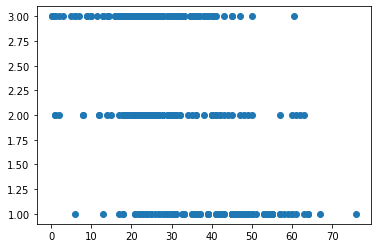

In [10]:
df_agenotnull = df_tst.loc[df_tst['Age'].notnull()]

plt.scatter(df_agenotnull.Age, df_agenotnull.Pclass)
df_agenotnull

## 3. Some exploratory data analysis

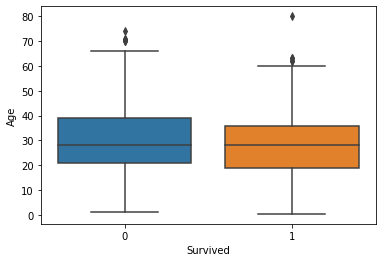

In [11]:
sns.boxplot(x=df['Survived'], y=df['Age'])

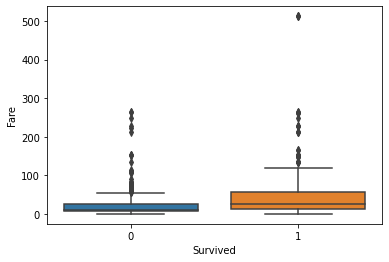

In [12]:
sns.boxplot(x=df['Survived'], y=df["Fare"])

In [13]:
"""
#df.describe(include=['object', 'bool'])
print(df['Embarked'].value_counts())

#the survival is correlated to the embarked feature let's classify it to make an ordinal feature 
print('S', df[['Embarked','Pclass','Survived']].loc[df['Embarked']=='S'].Survived.sum()/644)
print('C', df[['Embarked','Pclass','Survived']].loc[df['Embarked']=='C'].Survived.sum()/168)
print('Q', df[['Embarked','Pclass','Survived']].loc[df['Embarked']=='Q'].Survived.sum()/77)

embarked_mapper = {'S':1,'Q':2,'C':3}
df['Embarked'] = df['Embarked'].map(embarked_mapper)"""

"\n#df.describe(include=['object', 'bool'])\nprint(df['Embarked'].value_counts())\n\n#the survival is correlated to the embarked feature let's classify it to make an ordinal feature \nprint('S', df[['Embarked','Pclass','Survived']].loc[df['Embarked']=='S'].Survived.sum()/644)\nprint('C', df[['Embarked','Pclass','Survived']].loc[df['Embarked']=='C'].Survived.sum()/168)\nprint('Q', df[['Embarked','Pclass','Survived']].loc[df['Embarked']=='Q'].Survived.sum()/77)\n\nembarked_mapper = {'S':1,'Q':2,'C':3}\ndf['Embarked'] = df['Embarked'].map(embarked_mapper)"

## 4. Useful trasformations and feature engineering

In [14]:
gender_mapper = {"male":0,"female":1}
df["Sex"] = df["Sex"].map(gender_mapper)
df_tst["Sex"] = df_tst["Sex"].map(gender_mapper)

In [15]:
#df.set_index('PassengerId', inplace=True)
#df_tst.set_index('PassengerId', inplace=True)

In [16]:
df['Cabin']=df['Cabin'].fillna('X')
df_tst['Cabin']=df_tst['Cabin'].fillna('X')

df['Cabin_pref']=df['Cabin'].str.slice(0,1)
df_tst['Cabin_pref']=df_tst['Cabin'].str.slice(0,1)

df['Embarked']=df['Embarked'].fillna('X')
df_tst['Embarked']=df_tst['Embarked'].fillna('X')

df['Age'].fillna(df['Age'].mean(), inplace=True)
df_tst['Age'].fillna(df_tst['Age'].mean(), inplace=True)

df['Fare'].fillna(df['Fare'].mean(), inplace=True)
df_tst['Fare'].fillna(df_tst['Fare'].mean(), inplace=True)

In [17]:
df_cabsurv = df[['Cabin_pref','Survived']]
df['cabin_score'] = 0
cabin_mapper = {}

for pref in df['Cabin_pref'].unique():
    cabin_mapper.update({pref : df_cabsurv.loc[df['Cabin_pref'] == pref].Survived.sum()/df_cabsurv.loc[df['Cabin_pref'] == pref].size})

#the survival may be correlated to the Cabin_score feature let's classify it to make an ordinal feature 
df['cabin_score'] = df['Cabin_pref'].map(cabin_mapper) 
df_tst['cabin_score'] = df_tst['Cabin_pref'].map(cabin_mapper)    


df_embarksurv = df[['Embarked','Survived']]
df['embarked_score'] = 0
embarked_mapper = {}

for emb in df['Embarked'].unique():
    embarked_mapper.update({emb: df_embarksurv.loc[df['Embarked'] == emb].Survived.sum() / df_embarksurv.loc[df['Embarked'] == emb].size})

#the survival may be correlated to the embarked_score feature let's classify it to make an ordinal feature 
df['embarked_score'] = df['Embarked'].map(embarked_mapper)
df_tst['embarked_score'] = df_tst['Embarked'].map(embarked_mapper)

df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df_tst['Title'] = df_tst['Name'].str.extract('([A-Za-z]+)\.', expand=True)
df_titlesurv = df[['Title','Survived']]
df['title_score'] = 0
title_mapper = {}

for title in df['Title'].unique():
    title_mapper.update({title : df_titlesurv.loc[df['Title'] == title].Survived.sum()/df_titlesurv.loc[df['Title'] == title].size})
    
df['title_score'] = df['Title'].map(title_mapper)
df_tst['title_score'] = df_tst['Title'].map(title_mapper)

In [18]:
df[['Pclass','Sex','Age','SibSp','Parch','Fare','cabin_score','embarked_score','title_score']]

df_tst['title_score'].fillna(df_tst['title_score'].mean(), inplace=True)

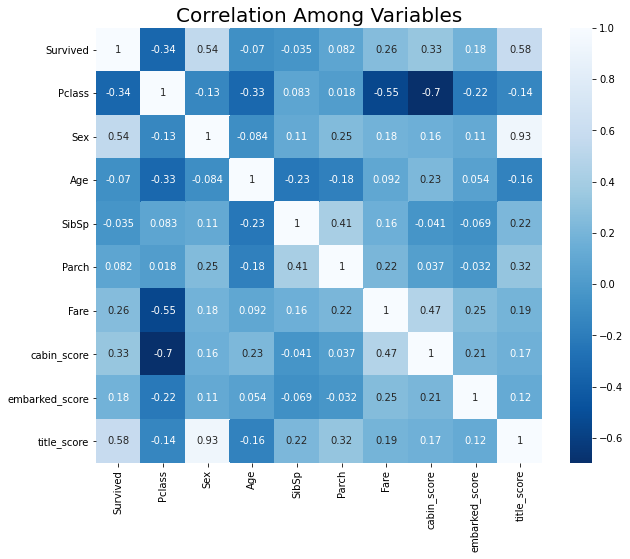

In [19]:
plt.subplots(figsize=(10,8))
sns.heatmap(df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','cabin_score','embarked_score','title_score']].corr(),annot=True,cmap='Blues_r')
plt.title("Correlation Among Variables", fontsize = 20);

## 5. Scaling and train test splitting

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_worked = scaler.fit_transform(df[['Pclass','Sex','Age','SibSp','Parch','Fare','cabin_score','embarked_score','title_score']])
df_tst_worked = scaler.transform(df_tst[['Pclass','Sex','Age','SibSp','Parch','Fare','cabin_score','embarked_score','title_score']])

df_worked

array([[ 0.82737724, -0.73769513, -0.5924806 , ..., -0.51765001,
        -0.52827361, -0.80497423],
       [-1.56610693,  1.35557354,  0.63878901, ...,  1.290563  ,
         1.91258376,  1.44634601],
       [ 0.82737724,  1.35557354, -0.2846632 , ..., -0.51765001,
        -0.52827361,  1.11255025],
       ...,
       [ 0.82737724,  1.35557354,  0.        , ..., -0.51765001,
        -0.52827361,  1.11255025],
       [-1.56610693, -0.73769513, -0.2846632 , ...,  1.290563  ,
         1.91258376, -0.80497423],
       [ 0.82737724, -0.73769513,  0.17706291, ..., -0.51765001,
         0.06504004, -0.80497423]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_worked, df['Survived'].values, test_size=0.20, random_state=40)

## 6. Modeling and evaluating

In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train,y_train)

logReg.score(X_test, y_test)

0.8491620111731844

In [23]:
logReg_predict = logReg.predict(df_tst_worked)

In [24]:
ids = df_tst['PassengerId']
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': logReg_predict })
output.to_csv('submission_logreg.csv', index=False)

In [25]:
from sklearn.ensemble import RandomForestClassifier

Random_forest = RandomForestClassifier(n_estimators=17)
Random_forest.fit(X_train,y_train)

randomForest_predict = Random_forest.predict(df_tst_worked)
randomForest_score = Random_forest.score(X_test,y_test)
# print("Random Forest Prediction :",RF_predict)
print("Random Forest Score :",randomForest_score)

Random Forest Score : 0.8379888268156425


In [26]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': randomForest_predict })
output.to_csv('submission_randforst.csv', index=False)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train, y_train)

KNN_predict = KNN_model.predict(df_tst_worked)
print("K Neighbours :",KNN_model.score(X_test,y_test))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': KNN_predict })
output.to_csv('submission_knn.csv', index=False)

K Neighbours : 0.8324022346368715


In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier()
dtree_model = dtree_model.fit(X_train, y_train)

tree_predict = dtree_model.predict(df_tst_worked)
print("Decision Tree :",dtree_model.score(X_test,y_test))

'''
data = tree.export_graphviz(dtree, out_file=None, feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','cabin_score','embarked_score'])
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()'''

Decision Tree : 0.8268156424581006


"\ndata = tree.export_graphviz(dtree, out_file=None, feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare','cabin_score','embarked_score'])\ngraph = pydotplus.graph_from_dot_data(data)\ngraph.write_png('mydecisiontree.png')\n\nimg=pltimg.imread('mydecisiontree.png')\nimgplot = plt.imshow(img)\nplt.show()"

In [29]:
from sklearn.svm import SVC

SVC_model = SVC(probability=True)
SVC_model.fit(X_train,y_train)
SVC_predict = SVC_model.predict(df_tst_worked)
SVC_score = SVC_model.score(X_test,y_test)
#print("Support Vector Classifier Prediction :",SVC_predict)
print("Support Vector Classifier Score :",SVC_score)

Support Vector Classifier Score : 0.8435754189944135


In [30]:
avg_predict = np.rint((randomForest_predict + KNN_predict + logReg_predict+SVC_predict+tree_predict)/5)

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': avg_predict })
output.to_csv('submission_avg.csv', index=False)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(KNN_model.predict(X_test), y_test, labels=[1,0])

array([[56, 10],
       [20, 93]])